In [101]:
## Imports
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

%matplotlib inline

DATASETS_DIR = 'datasets'

In [102]:
## Função auxiliar
def load_dataset(dataset_name):
    dataset = pd.read_csv(os.path.join(DATASETS_DIR, dataset_name+'.txt'), sep='\t', index_col = 0)
    return dataset

In [114]:
## Entrada de dados
maxiter = 100
k = 2
nome_arquivo = 'monkey'

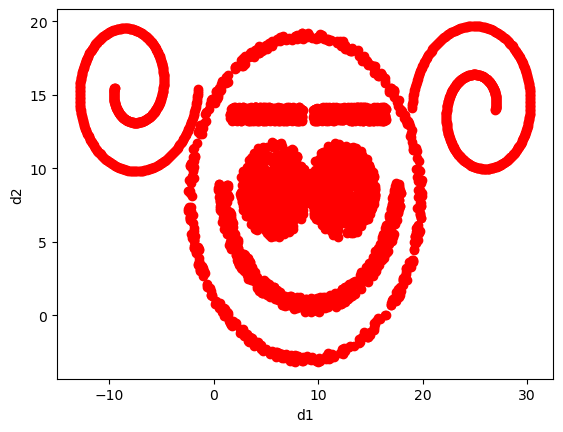

In [115]:
## Plot dos dados de entrada
dados = load_dataset(nome_arquivo)
X = dados[['d1', 'd2']]
plt.scatter(X["d1"],X["d2"], c="red")
plt.xlabel("d1")
plt.ylabel("d2")
plt.show()

In [116]:
## Execução do k-médias
kmedias_ = KMeans(n_clusters=k, max_iter = maxiter)
kmedias = kmedias_.fit_predict(dados[['d1', 'd2']])

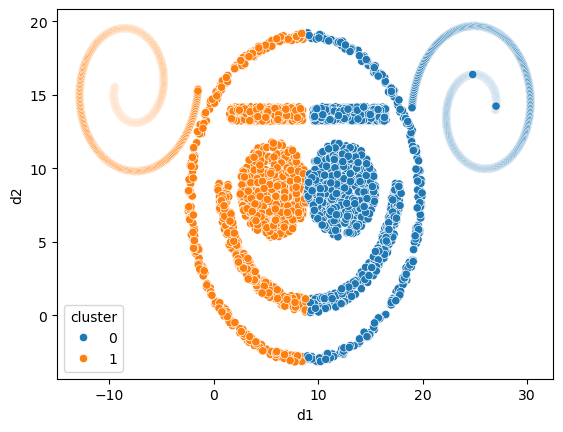

In [117]:
## Plotar após k-médias
df = pd.DataFrame(dados)
df.columns = ["d1","d2"]
df["cluster"] = kmedias
cores = sns.color_palette()[0:k]
df = df.sort_values("sample_label")
sns.scatterplot(data = df, x=df["d1"], y=df["d2"], hue=df["cluster"], palette=cores)
plt.show()

In [107]:
## Exportar arquivo
select_ = ['sample_label', 'cluster']
select = [x for x in df.columns if x in select_]
export = df[select]
export.to_csv(nome_arquivo + '.csv')